In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Dataset

In [2]:
df = pd.read_csv('adult(cleaned).csv')

### Metrics 

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def metrics(y_true, y_pred):
    print(f"accuracy : {accuracy_score(y_true, y_pred)}" )
    print(f"recall : {recall_score(y_true, y_pred)}" )
    print(f"precision : {precision_score(y_true, y_pred)}" )
    print(f"f1 : {f1_score(y_true, y_pred)}" )
    cm = confusion_matrix(y_true, y_pred)
    print(f"confusion matrix: {cm}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### Train test Split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x = df.drop('income', axis=1)
y = df[['income']]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, stratify=y)

### Importing the classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
DecTree = DecisionTreeClassifier()

### Training with normalized dataset

In [9]:
DecTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred = DecTree.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score

accuracy : 0.7964201928925189
recall : 0.6081932773109243
precision : 0.5866261398176292
f1 : 0.5972150593089222
confusion matrix: [[7429 1224]
 [1119 1737]]


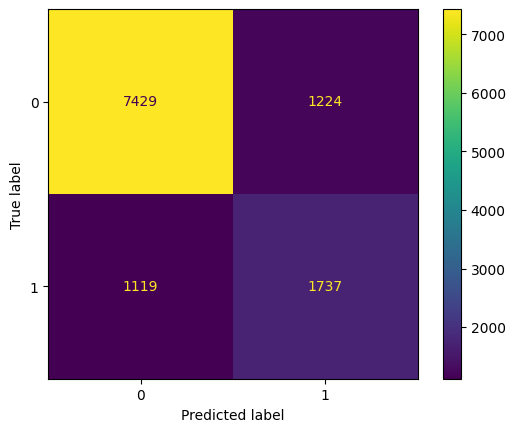

In [12]:
metrics(y_test, y_pred)

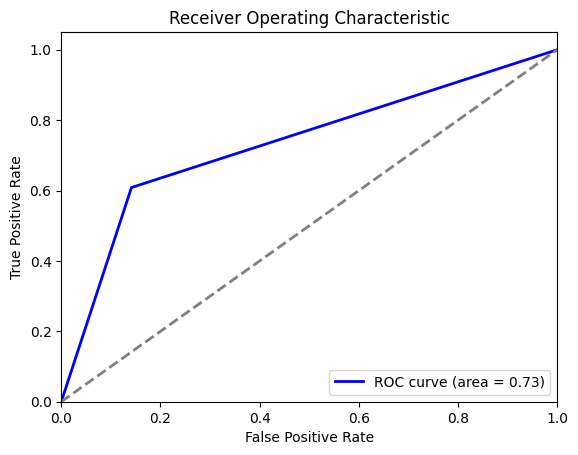

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the test set
y_scores = DecTree.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_scores))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Training with non normalized dataset

In [14]:
df_non_normalized = pd.read_csv('adult(cleaned non normalized).csv')

In [15]:
x = df_non_normalized.drop('income', axis=1)
y = df_non_normalized[['income']]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [17]:
DecTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred = DecTree.predict(x_test)

In [19]:
accuracy_score(y_test, y_pred)

0.742626728110599